# Exploring and understanding LAMAS streets data

* Distance seems correct when checking in google maps to compare. 
* Each section seems to be between streets

In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display

In [12]:
ta_streets = gpd.read_file("./csv_tables/TA_streets_20240724_031704/Streets.shp")
ta_streets[ta_streets.shemangli == "YIG'AL ALLON"].geometry.length.sum()

2971.942967311407

In [14]:
ta_streets[ta_streets.shemangli == "YIG'AL ALLON"].geometry.length.sum()


2971.942967311407

In [18]:
ta_streets[ta_streets.oidrechov == 4.0].geometry.length

3    25.97954
dtype: float64

In [4]:
# loading accidents and BP
accidents_bp_distance = gpd.read_parquet('./csv_tables/accidents_bp_distance_ta.parquet')
accidents_bp_distance.set_geometry('geometry', inplace=True)
display(accidents_bp_distance.crs)
ta_streets = ta_streets.to_crs(epsg=4326)
ta_streets

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka,geometry
0,1.0,915.0,הרוגי מלכות,HARUGEY MALKHOT,336.0,רחוב,0.0,507-10001,قتل مملكة,100.0,"LINESTRING (34.83219 32.10998, 34.83250 32.10984)"
1,2.0,0.0,0,UKNOWN,0.0,רחוב,3.0,507-10002,None,100.0,"LINESTRING (34.76948 32.08689, 34.77027 32.08679)"
2,3.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,1.0,507-10003,أمستردام,100.0,"LINESTRING (34.77889 32.08664, 34.77954 32.08648)"
3,4.0,644.0,אלון יגאל,YIG'AL ALLON,2524.0,רחוב,0.0,507-10004,ألون ييغال,200.0,"LINESTRING (34.79662 32.07734, 34.79675 32.07755)"
4,5.0,634.0,מרגולין,MARGOLIN,2649.0,רחוב,1.0,507-10005,مارغولين,100.0,"LINESTRING (34.79370 32.05846, 34.79455 32.05844)"
...,...,...,...,...,...,...,...,...,...,...,...
8874,9851.0,3007.0,שבטי ישראל,SHIVTEY YISRA'EL,1983.0,רחוב,0.0,507-17843,قبائل إسرائيل,100.0,"LINESTRING (34.75581 32.04727, 34.75568 32.04703)"
8875,9852.0,3058.0,אבינרי יצחק,AVINERY,2027.0,רחוב,0.0,507-20562,Avinri Yitzhak,100.0,"LINESTRING (34.75387 32.04869, 34.75431 32.048..."
8876,9853.0,3058.0,אבינרי יצחק,AVINERY,2027.0,רחוב,0.0,507-20563,Avinri Yitzhak,100.0,"LINESTRING (34.75506 32.04765, 34.75568 32.047..."
8877,9855.0,3907.0,3907,None,1703.0,רחוב,0.0,507-21960,3907,100.0,"LINESTRING (34.74850 32.04425, 34.74837 32.044..."


In [5]:
ta_streets[(ta_streets.shemangli == "AMSTERDAM") ]

,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka,geometry
2,3.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,1.0,507-10003,أمستردام,100.0,"LINESTRING (34.77889 32.08664, 34.77954 32.08648)"
616,628.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,2.0,507-10749,أمستردام,100.0,"LINESTRING (34.77954 32.08648, 34.78034 32.08629)"
617,629.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,1.0,507-10750,أمستردام,100.0,"LINESTRING (34.78034 32.08629, 34.78105 32.08613)"
618,630.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,1.0,507-10751,أمستردام,100.0,"LINESTRING (34.77793 32.08687, 34.77889 32.08664)"


In [6]:
ta_streets[(ta_streets.shemangli == "AMSTERDAM") & (ta_streets.oidrechov.isin([3.0, 628.0]))]

,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka,geometry
2,3.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,1.0,507-10003,أمستردام,100.0,"LINESTRING (34.77889 32.08664, 34.77954 32.08648)"
616,628.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,2.0,507-10749,أمستردام,100.0,"LINESTRING (34.77954 32.08648, 34.78034 32.08629)"


In [16]:
ta_streets[ta_streets.shemangli == "AMSTERDAM"].geometry.length.sum()

305.6053449580957

In [8]:
ta_streets[(ta_streets.shemangli == "AMSTERDAM") & (ta_streets.oidrechov.isin([629.0]))].geometry.length

C:\Users\itay8\AppData\Local\Temp\ipykernel_14916\4089811053.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ta_streets[(ta_streets.shemangli == "AMSTERDAM") & (ta_streets.oidrechov.isin([629.0]))].geometry.length


617    0.000723
dtype: float64

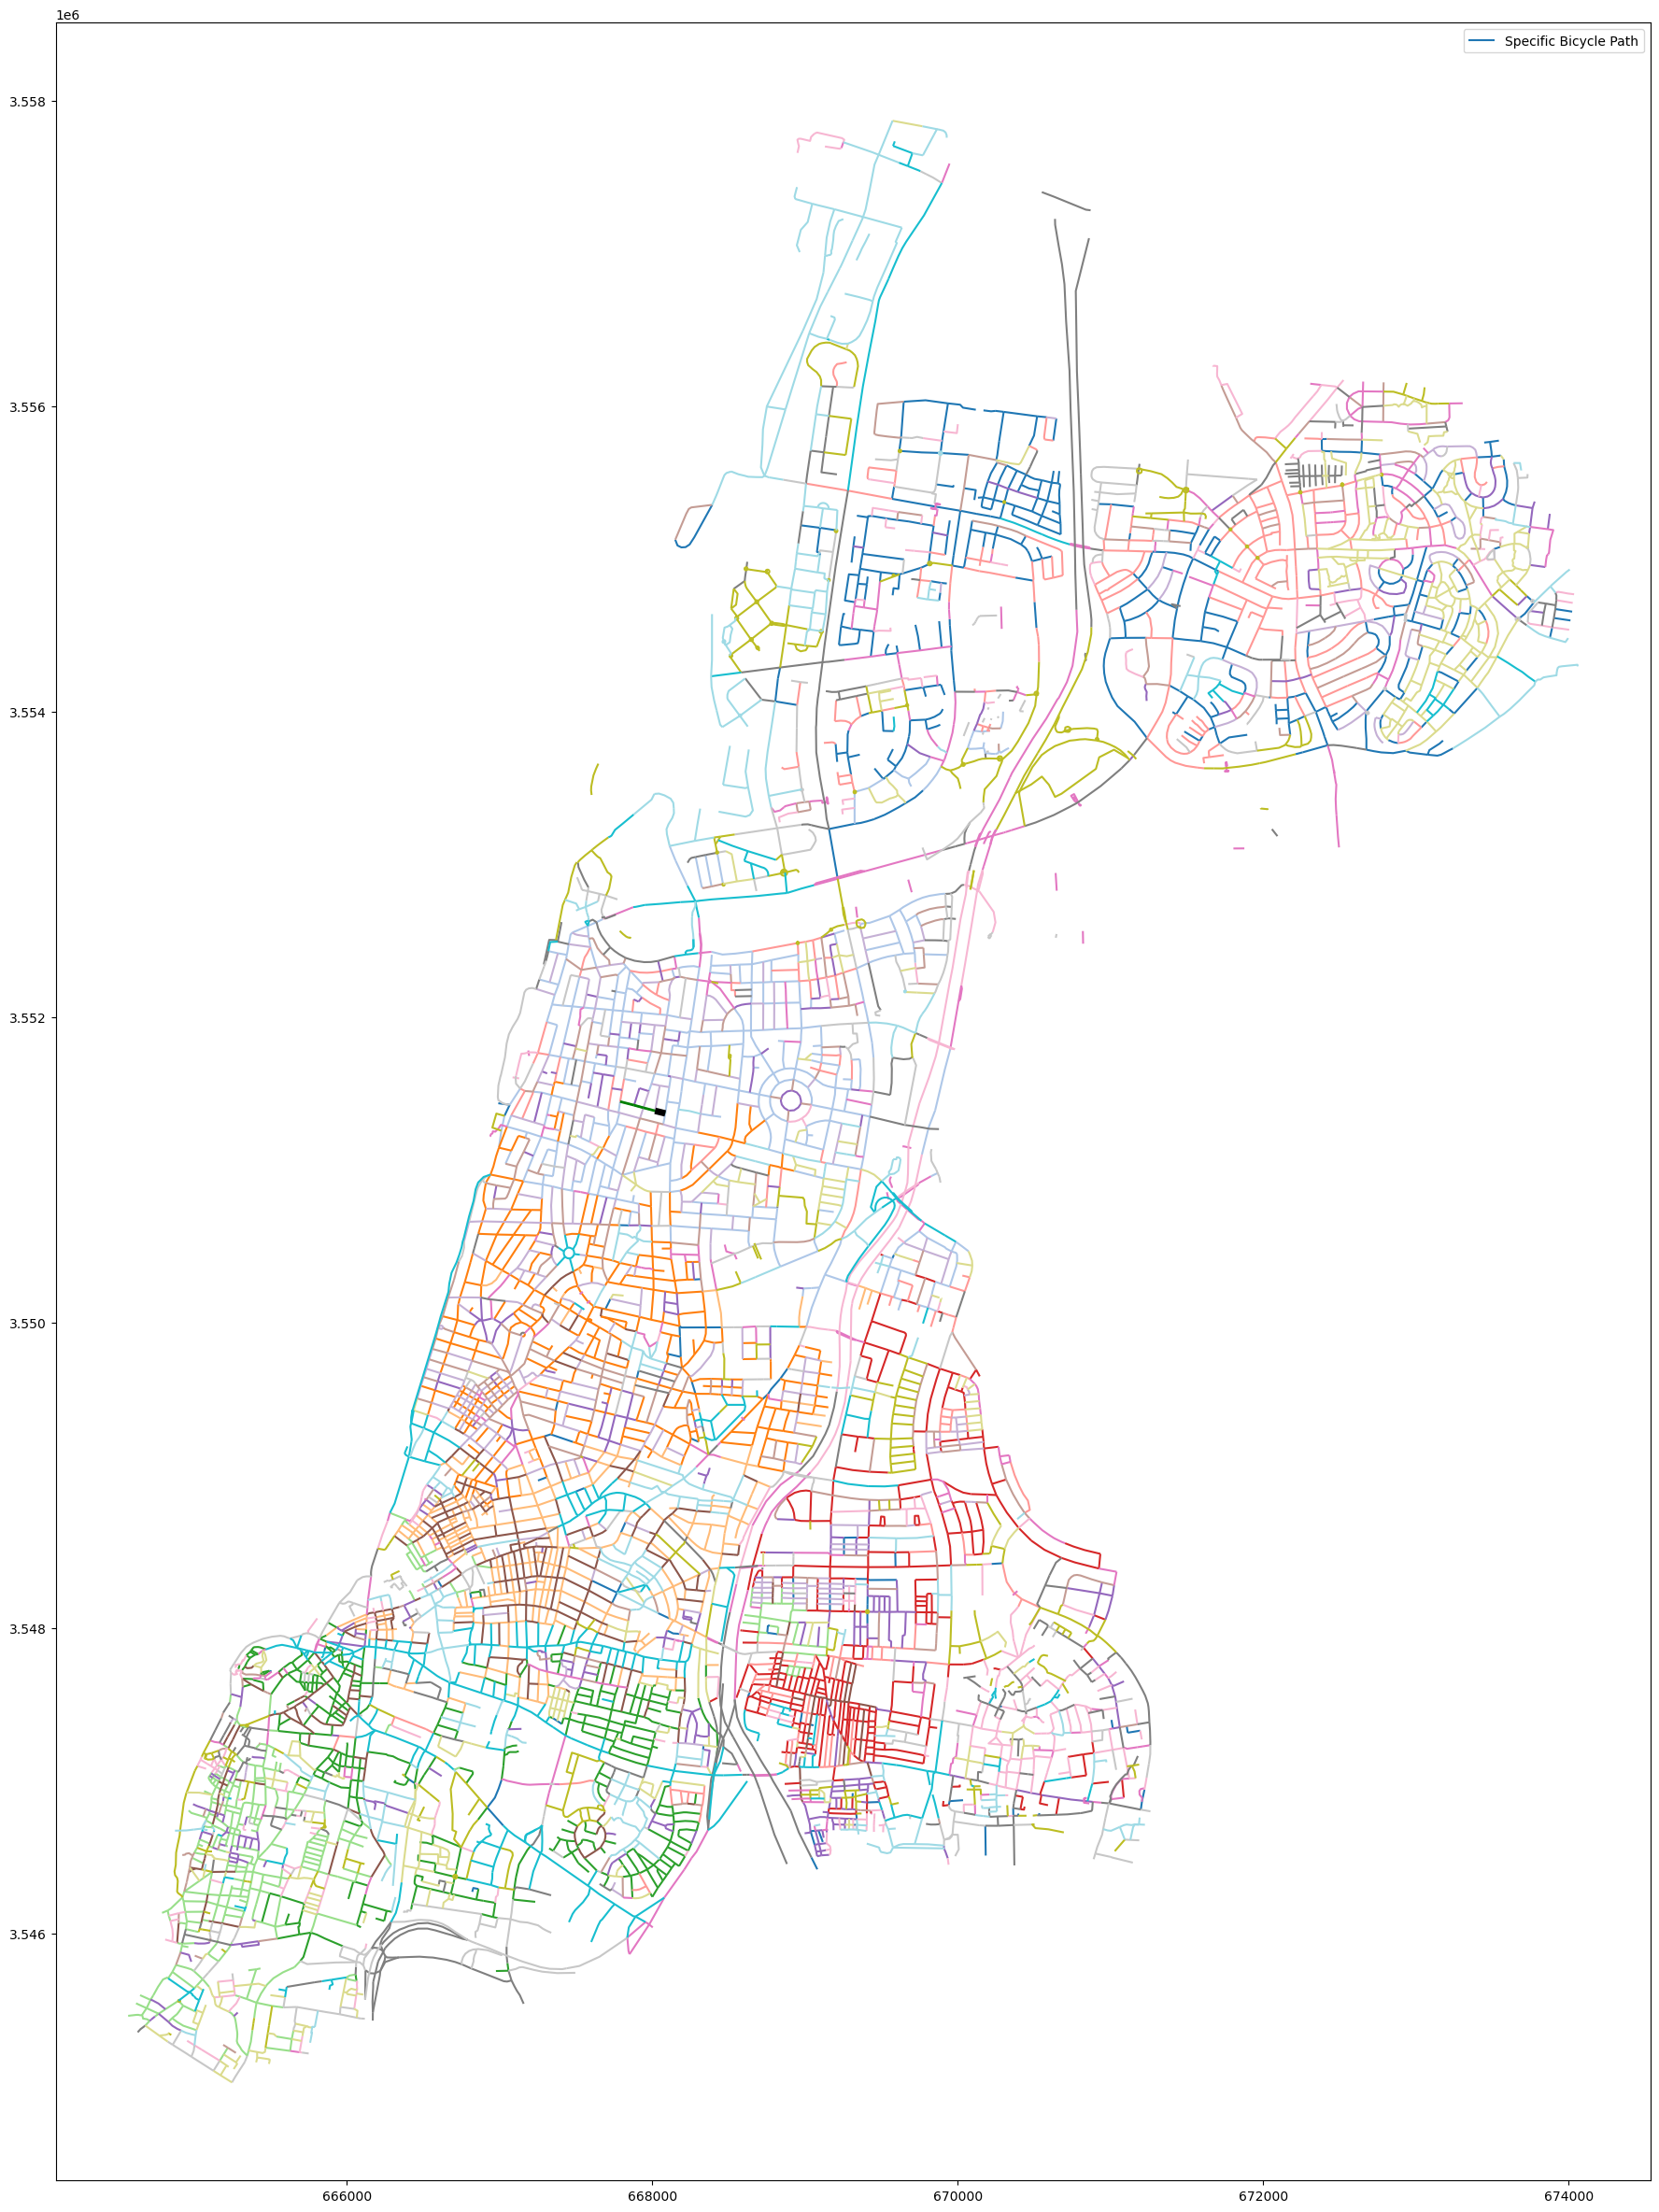

In [19]:

fig, ax = plt.subplots(figsize=(30, 30))

ta_streets.plot(ax=ax, cmap='tab20', legend=True, label='Specific Bicycle Path')
ta_streets[ta_streets.shemangli == "AMSTERDAM"].plot(ax=ax, color='green', linewidth=2)
ta_streets[(ta_streets.shemangli == "AMSTERDAM") & (ta_streets.oidrechov.isin([629.0]))].plot(ax=ax, color='black', linewidth=5)
accidents_bp_distance.plot(ax=ax, color='black', marker='o', label='Accidents on big buff', markersize=20 )
# ta_streets[ta_streets.oidrechov == 4.0].plot()
# accidents_bp_distance['poly_geo'].plot(ax=ax, color='blue', label='Specific Bicycle Path')

plt.legend()
plt.show()